In [1]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
import os
import cv2
import math
import numpy as np
import copy
import itertools
import csv
from collections import Counter
from collections import deque
from utils import CvFpsCalc
from matplotlib import pyplot as plt

In [3]:

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480


def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  return img

def load_images_from_folder(folder):
    images = []
    
    for filename in os.listdir(folder):
        #print(filename)
        os.chdir(folder)
        img = cv2.imread(filename)
        #print(img)
        if img is not None:
            img=resize_and_show(img)
            images.append(img)
    return images




In [4]:
def calc_landmark_list(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_point = []

    # Keypoint
    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)
        # landmark_z = landmark.z

        landmark_point.append([landmark_x, landmark_y])

    return landmark_point

In [5]:
def pre_process_landmark(landmark_list):
    temp_landmark_list = copy.deepcopy(landmark_list)

    # Convert to relative coordinates
    base_x, base_y = 0, 0
    for index, landmark_point in enumerate(temp_landmark_list):
        if index == 0:
            base_x, base_y = landmark_point[0], landmark_point[1]

        temp_landmark_list[index][0] = temp_landmark_list[index][0] - base_x
        temp_landmark_list[index][1] = temp_landmark_list[index][1] - base_y

    # Convert to a one-dimensional list
    temp_landmark_list = list(
        itertools.chain.from_iterable(temp_landmark_list))

    # Normalization
    max_value = max(list(map(abs, temp_landmark_list)))
    def normalize_(n):
        return n / max_value

    temp_landmark_list = list(map(normalize_, temp_landmark_list))

    return temp_landmark_list

In [6]:
def draw_landmarks(image, landmark_point):
    if len(landmark_point) > 0:
        # Thumb
        cv2.line(image, tuple(landmark_point[2]), tuple(landmark_point[3]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[2]), tuple(landmark_point[3]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[3]), tuple(landmark_point[4]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[3]), tuple(landmark_point[4]),
                (255, 255, 255), 2)

        # Index finger
        cv2.line(image, tuple(landmark_point[5]), tuple(landmark_point[6]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[5]), tuple(landmark_point[6]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[6]), tuple(landmark_point[7]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[6]), tuple(landmark_point[7]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[7]), tuple(landmark_point[8]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[7]), tuple(landmark_point[8]),
                (255, 255, 255), 2)

        # Middle finger
        cv2.line(image, tuple(landmark_point[9]), tuple(landmark_point[10]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[9]), tuple(landmark_point[10]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[10]), tuple(landmark_point[11]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[10]), tuple(landmark_point[11]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[11]), tuple(landmark_point[12]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[11]), tuple(landmark_point[12]),
                (255, 255, 255), 2)

        # Ring finger
        cv2.line(image, tuple(landmark_point[13]), tuple(landmark_point[14]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[13]), tuple(landmark_point[14]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[14]), tuple(landmark_point[15]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[14]), tuple(landmark_point[15]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[15]), tuple(landmark_point[16]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[15]), tuple(landmark_point[16]),
                (255, 255, 255), 2)

        # Little finger
        cv2.line(image, tuple(landmark_point[17]), tuple(landmark_point[18]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[17]), tuple(landmark_point[18]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[18]), tuple(landmark_point[19]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[18]), tuple(landmark_point[19]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[19]), tuple(landmark_point[20]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[19]), tuple(landmark_point[20]),
                (255, 255, 255), 2)

        # Palm
        cv2.line(image, tuple(landmark_point[0]), tuple(landmark_point[1]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[0]), tuple(landmark_point[1]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[1]), tuple(landmark_point[2]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[1]), tuple(landmark_point[2]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[2]), tuple(landmark_point[5]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[2]), tuple(landmark_point[5]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[5]), tuple(landmark_point[9]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[5]), tuple(landmark_point[9]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[9]), tuple(landmark_point[13]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[9]), tuple(landmark_point[13]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[13]), tuple(landmark_point[17]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[13]), tuple(landmark_point[17]),
                (255, 255, 255), 2)
        cv2.line(image, tuple(landmark_point[17]), tuple(landmark_point[0]),
                (0, 0, 0), 6)
        cv2.line(image, tuple(landmark_point[17]), tuple(landmark_point[0]),
                (255, 255, 255), 2)

    # Key Points
    for index, landmark in enumerate(landmark_point):
        if index == 0:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 1: 
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 2:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 3:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 4:  
            cv2.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 5: 
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 6:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 7:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 8:  
            cv2.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 9:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 10:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 11:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 12:  
            cv2.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 13:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 14:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 15:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 16:  
            cv2.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 17:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 18:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 19:  
            cv2.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 20: 
            cv2.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv2.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)

    return image

In [5]:
#Pre-process the frames of data and choosing where the hand is displaying the sign

# To list what are the directories
root_dir="C:\\Users\\HP\\Desktop\\video_to_frames\\PolishAlphabet_SignLanguage_Detection\\input"
output_dir="C:\\Users\\HP\\Desktop\\video_to_frames\\PolishAlphabet_SignLanguage_Detection\\ouput3"

letters = os.listdir(root_dir)
print(letters)

for letter in letters:
    counter=0
    input_path=os.path.join(root_dir,letter)
    data = os.listdir(input_path)
    for d in data:
        data_path=os.path.join(input_path,d)
        print(data_path)
       
        output_path=os.path.join(output_dir,letter)
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        os.chdir(data_path)
        images=load_images_from_folder(data_path)
        flag=0
        #print(images)
         
        with mp_hands.Hands(static_image_mode=True, max_num_hands=2, \
                            min_detection_confidence=0.7) as hands:
            for image in images:
                if(flag==1):
                    cv2.destroyAllWindows()
                    break

                results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
                if not results.multi_hand_landmarks:
                    continue

                image_hight, image_width, _ = image.shape
                #print(image_hight)
                annotated_image = cv2.flip(image.copy(), 1)

                for hand_landmarks in results.multi_hand_landmarks:
                    if(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y<0.6):
                        counter+=1

                    img=resize_and_show(cv2.flip(annotated_image, 1))
                    os.chdir(output_path)
                    cv2.imwrite(str(letter) + '_{:01d}'.format(counter) + '.png',img)

['Ó', 'Ę', 'Ł', 'Ń', 'Ś', 'Ź', 'Ż']
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\10Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\11Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\12Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\13Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\1Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\2Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\3Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\5Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\6Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\7Ó
C:\Users\HP\Desktop\video_to_frames\PolishAlphabet_SignLanguage_Detection\input\Ó\8Ó
C:\Users\HP\Desktop\video

[[565, 249], [527, 245], [493, 224], [473, 202], [458, 183], [526, 160], [527, 121], [531, 98], [536, 80], [550, 154], [552, 112], [555, 86], [560, 66], [572, 156], [574, 117], [575, 94], [576, 75], [593, 165], [598, 135], [600, 117], [601, 102]]


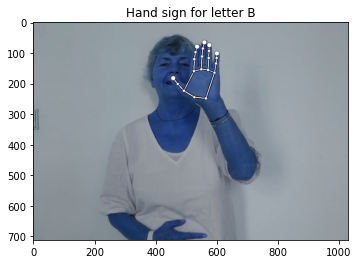

In [15]:
#testing pre-processing of  co-ordinates
image=cv2.imread('C:\\Users\\HP\\Downloads\\test_B.png')
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
   
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    if results.multi_hand_landmarks is not None:
        for hand_landmarks in results.multi_hand_landmarks:
            
            # Landmark calculation
            landmark_list = calc_landmark_list(image, hand_landmarks)

            print(landmark_list)
            annotated_image = cv2.flip(image.copy(), 1)
            rel_img=draw_landmarks(annotated_image, landmark_list)
            plt.imshow(rel_img)
            plt.title('Hand sign for letter B')
           

In [9]:
 # Conversion to relative coordinates / normalized coordinates
pre_processed_landmark_list = pre_process_landmark(
        landmark_list)

print(pre_processed_landmark_list)

[0.0, 0.0, -0.20765027322404372, -0.02185792349726776, -0.39344262295081966, -0.1366120218579235, -0.5027322404371585, -0.2568306010928962, -0.5846994535519126, -0.36065573770491804, -0.21311475409836064, -0.48633879781420764, -0.20765027322404372, -0.6994535519125683, -0.18579234972677597, -0.825136612021858, -0.15846994535519127, -0.9234972677595629, -0.08196721311475409, -0.5191256830601093, -0.07103825136612021, -0.7486338797814208, -0.0546448087431694, -0.8907103825136612, -0.0273224043715847, -1.0, 0.03825136612021858, -0.5081967213114754, 0.04918032786885246, -0.7213114754098361, 0.0546448087431694, -0.8469945355191257, 0.060109289617486336, -0.9508196721311475, 0.15300546448087432, -0.45901639344262296, 0.18032786885245902, -0.6229508196721312, 0.1912568306010929, -0.7213114754098361, 0.19672131147540983, -0.8032786885245902]


In [14]:
def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]
a=to_matrix(pre_processed_landmark_list,2)
a

[[0.0, 0.0],
 [-0.20765027322404372, -0.02185792349726776],
 [-0.39344262295081966, -0.1366120218579235],
 [-0.5027322404371585, -0.2568306010928962],
 [-0.5846994535519126, -0.36065573770491804],
 [-0.21311475409836064, -0.48633879781420764],
 [-0.20765027322404372, -0.6994535519125683],
 [-0.18579234972677597, -0.825136612021858],
 [-0.15846994535519127, -0.9234972677595629],
 [-0.08196721311475409, -0.5191256830601093],
 [-0.07103825136612021, -0.7486338797814208],
 [-0.0546448087431694, -0.8907103825136612],
 [-0.0273224043715847, -1.0],
 [0.03825136612021858, -0.5081967213114754],
 [0.04918032786885246, -0.7213114754098361],
 [0.0546448087431694, -0.8469945355191257],
 [0.060109289617486336, -0.9508196721311475],
 [0.15300546448087432, -0.45901639344262296],
 [0.18032786885245902, -0.6229508196721312],
 [0.1912568306010929, -0.7213114754098361],
 [0.19672131147540983, -0.8032786885245902]]

In [28]:
#defined in mediapipe library(hand connection indexes)
index_arr = [[0,1],[1,2],[2,3],[3,4], \
            [0,5],[5,6],[6,7],[7,8], \
            [0,17],[17,18],[18,19],[19,20], 
            [5,9],[9,13],[13,17],\
            [9,10],[10,11],[11,12],\
             [13,14],[14,15],[15,16],\
             [17,18],[18,19],[19,20]]

In [36]:
index_arr[0]

0

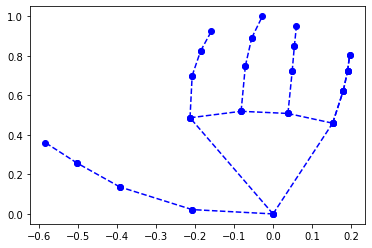

In [43]:
#Plotting the relative co-ordinates to verify if we have the same hand sign
for lines in index_arr:

    x_values = [a[lines[0]][0], a[lines[1]][0]]
    y_values = [-a[lines[0]][1], -a[lines[1]][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")

In [ ]:
#This code is for bounding box(not need for the time being)

# mphands = mp.solutions.hands
# hands = mphands.Hands()
# mp_drawing = mp.solutions.drawing_utils
# cap = cv2.VideoCapture(0)

# _, frame = cap.read()

# h, w, c = frame.shape

# while True:
#     _, frame = cap.read()
#     framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     result = hands.process(framergb)
#     hand_landmarks = result.multi_hand_landmarks
#     if hand_landmarks:
#         for handLMs in hand_landmarks:
#             x_max = 0
#             y_max = 0
#             x_min = w
#             y_min = h
#             for lm in handLMs.landmark:
#                 x, y = int(lm.x * w), int(lm.y * h)
#                 if x > x_max:
#                     x_max = x
#                 if x < x_min:
#                     x_min = x
#                 if y > y_max:
#                     y_max = y
#                 if y < y_min:
#                     y_min = y
#             cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
#             mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)
    
#     cv2.imshow("Frame", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#           break

In [7]:
def logging_csv(number, mode, landmark_list, point_history_list):
# if mode == 0:
#     pass
# if mode == 1 and (0 <= number <= 9):
    csv_path = 'model/keypoint_classifier/keypoint.csv'
    with open(csv_path, 'a', newline="") as f:
        writer = csv.writer(f)
        writer.writerow([number, *landmark_list])

    return
   

In [10]:
#Land mark collection
root_dir="C:\\Users\\HP\\Desktop\\video_to_frames\\PolishAlphabet_SignLanguage_Detection\\input"
letters=os.listdir(root_dir)
letters.sort()
label=-1
for letter in letters:
    label=label+1
    input_dir =os.path.join(root_dir,letter)
    images=load_images_from_folder(input_dir)
    os.chdir("C:\\Users\\HP\\Desktop\\Thesis\\PolishAlphabet_SignLanguage_Detection")
    for image in images:
        with mp_hands.Hands(
            static_image_mode=True,
            max_num_hands=2,
            min_detection_confidence=0.7) as hands:
        
            results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

            if results.multi_hand_landmarks is not None:
                for hand_landmarks in results.multi_hand_landmarks:
                    
                    # Landmark calculation
                    landmark_list = calc_landmark_list(image, hand_landmarks)

                    #print(landmark_list)
                    # Conversion to relative coordinates / normalized coordinates
                    pre_processed_landmark_list = pre_process_landmark(
                            landmark_list)

                    #print(pre_processed_landmark_list)
                    # Write to the dataset file
                    logging_csv(label, 1, pre_processed_landmark_list,[])
                    